In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import sctk as sk
import seaborn

In [2]:
adata = sc.read_h5ad("../data/rna/scRNA_batch1_2.processed.fibroblasts.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 26727 × 17590
    obs: 'doublet_bh_pval', 'n_counts', 'sample_id', 'scrublet_score', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50', 'GEX_SID', 'ATAC_SID', 'GEX', 'ATAC', 'Sample', 'DOB', 'Gender', 'date', 'age_years', 'state', 'disease', 'site_taken_fine', 'site_taken_broad', 'sorted', 'Nancy_histologic_score', 'slide_look_other', 'whole_tissue_signature', 'scSeq', 'bulkSeq', 'annot_batch1_lr', 'annot_batch1_lr_prob', 'annot_batch2_lr', 'annot_batch2_lr_prob', 'leiden_bk_r0_1', 'leiden_bk_r0_3', 'leiden_bk_r0_5', 'is_doublet', 'leiden_bk_split1', 'leiden_bk_split2', 'leiden_bk_split3', 'annot1', 'leiden_bk_split4', 'annot_gut_lr', 'annot_gut_lr_prob', 'broad_annot1'
    var: 'gene_ids', 'mito', 'ribo', 'hb', 'n_counts', 'n_cells', 'cc', 'highly_variable', 'highly_variable_nbatches', 'hvg_full'
    uns: 'annot1_colors', 'leiden', 'neighbors', 'neighbors_bk', 'pca', 'umap'
    obsm: 'X_pca'

In [4]:
#print(adata.X[1:20, 1:10])

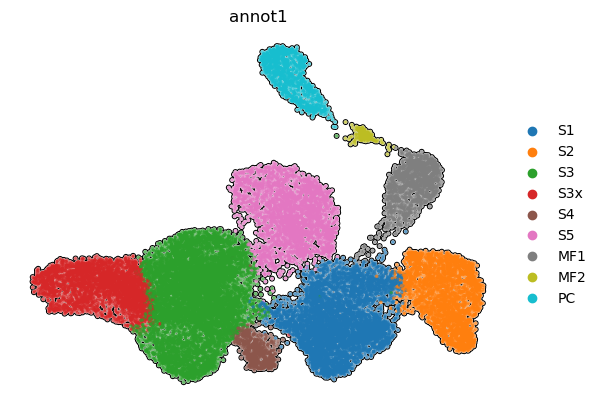

In [5]:
sc.pl.umap(
    adata,
    color='annot1',
    palette='tab10',
    frameon=False,
    size=25,  # point size
    add_outline=True,
    #legend_loc='on data',
    #save='UMAP_RNA_fibroblast_MF_PC_outline.pdf'  # in ./figures
)

## Original dotplot, resized

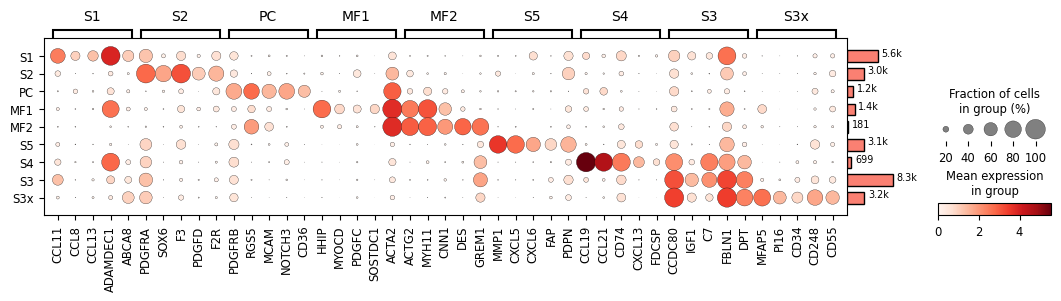

In [6]:
# Plot top-5 selected markers from Matthias, Marker genes_scRNAseq_Matthias_Simon.xlx
marker_dict = {
    'S1': ['CCL11', 'CCL8', 'CCL13', 'ADAMDEC1', 'ABCA8'],
    'S2': ['PDGFRA', 'SOX6', 'F3', 'PDGFD', 'F2R'],
    'S3': ['CCDC80', 'IGF1',  'C7', 'FBLN1', 'DPT'],
    'S3x': ['MFAP5', 'PI16', 'CD34', 'CD248', 'CD55'],
    'S4': ['CCL19', 'CCL21', 'CD74', 'CXCL13', 'FDCSP'],
    'S5': ['MMP1', 'CXCL5', 'CXCL6', 'FAP', 'PDPN'],
    'MF1': ['HHIP', 'MYOCD', 'PDGFC',  'SOSTDC1', 'ACTA2'],
    'MF2': ['ACTG2', 'MYH11', 'CNN1', 'DES', 'GREM1'],
    'PC': ['PDGFRB', 'RGS5', 'MCAM', 'NOTCH3', 'CD36']
}

plot = sc.pl.dotplot(adata, 
                     var_names=marker_dict, groupby='annot1', return_fig=True,
                     dendrogram=True,
                     figsize=(13, 2.3))
plot.add_totals()
plot.savefig('figures/dotplot_fibroblast_selected_markers_top5_barplot_v2.pdf')

## Dotplot with markers found in Xenium 5k data

In [7]:
marker_dict = {
    "Fibroblast-Contractile gradient": ["PDGFRA", "MYLK", "MYH9", "CCDC80", "CXCL12"],
    "Mucosa ulceration": ["FAP", "PDPN", "COL7A1", "WNT5A",
                          #"MMP12"
                         ],
    "Submucosa organised lymphoid structure": ["CCL19", "MMP9", "CXCL9", "UBD"],
    "Submucosa perivascular": ["MFAP5", "PI16", "CD34", "CD248", "CD55", "CA12", "MCAM",
                               #"CCN1",
                               "NOTCH3", "PDGFRB", "RGS5"],
    "Muscularis propria": ["ACTN1", "AOC3", "SYNM", "TAC3", "TACR2", "MTCL1", "DPT"],
    "Submucosa fibrosis": ["GREM1", "GREM2", "NPNT", "THY1", "NBL1", "RCAN2", "NR4A1", "SOSTDC1"], 
    "Mucosa lamina propria": ["PTCH1", "ITGB3", "LTBP1", "ADAMDEC1", "F2R", "TRPA1", "BMP7", "BMP5", "MMP11", "COL4A1"],
    "Serosa": ["SOCS3","NR4A1"]
}

categories: S1, S2, S3, etc.
var_group_labels: Fibroblast-Contractile gradient, Mucosa ulceration, Submucosa organised lymphoid structure, etc.


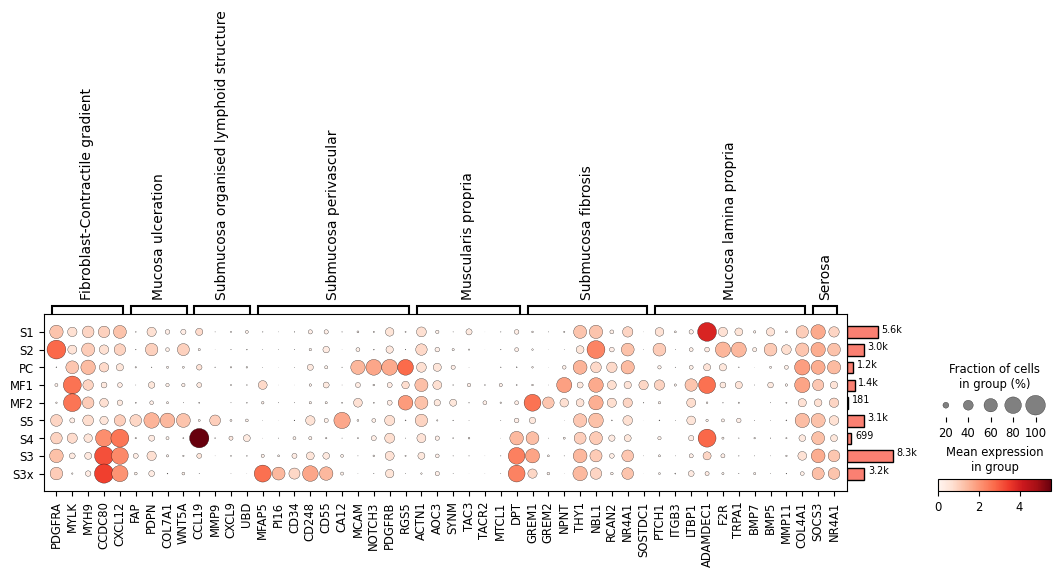

In [8]:
plot = sc.pl.dotplot(
    adata,
    var_names=marker_dict,
    groupby="annot1",
    dendrogram=True,
    #categories_order=cell_order,
    figsize=(13, 2.3),
    return_fig=True,
    cmap='Reds',
    #save="xenium5k_v5_mesenchymal_annot_suspension_markers.pdf"
)

plot.add_totals()
plot.savefig("figures/dotplot_fibroblast_xenium_markers_barplot.pdf")

## Merged dotplots: original + Xenium markers

In [28]:
marker_dict = {
    'S1': ['CCL11', 'CCL8', 'CCL13', 'ADAMDEC1', 'ABCA8'],
    'S2': ['PDGFRA', 'SOX6', 'F3', 'PDGFD', 'F2R'],
    'S3': ['CCDC80', 'IGF1',  'C7', 'FBLN1', 'DPT'],
    'S3x': ['MFAP5', 'PI16', 'CD34', 'CD248', 'CD55'],
    'S4': ['CCL19', 'CCL21', 'CD74', 'CXCL13', 'FDCSP'],
    'S5': ['MMP1', 'CXCL5', 'CXCL6', 'FAP', 'PDPN'],
    'MF1': ['HHIP', 'MYOCD', 'PDGFC',  'SOSTDC1', 'ACTA2'],
    'MF2': ['ACTG2', 'MYH11', 'CNN1', 'DES', 'GREM1'],
    'PC': ['PDGFRB', 'RGS5', 'MCAM', 'NOTCH3', 'CD36'],
    "Fibroblast-Contractile gradient": ["PDGFRA", "MYLK", "MYH9", "CCDC80", "CXCL12"],
    "Mucosa ulceration": ["FAP", "PDPN", "COL7A1", "WNT5A",
                          #"MMP12"
                         ],
    "Submucosa organised lymphoid structure": ["CCL19", "MMP9", "CXCL9", "UBD"],
    "Submucosa perivascular": ["MFAP5", "PI16", "CD34", "CD248", "CD55", "CA12", "MCAM",
                               #"CCN1",
                               "NOTCH3", "PDGFRB", "RGS5"],
    "Muscularis propria": ["ACTN1", "AOC3", "SYNM", "TAC3", "TACR2", "MTCL1", "DPT"],
    "Submucosa fibrosis": ["GREM1", "GREM2", "NPNT", "THY1", "NBL1", "RCAN2", "NR4A1", "SOSTDC1"], 
    "Mucosa lamina propria": ["PTCH1", "ITGB3", "LTBP1", "ADAMDEC1", "F2R", "TRPA1", "BMP7", "BMP5", "MMP11", "COL4A1"],
    "Serosa": ["SOCS3","NR4A1"]
}


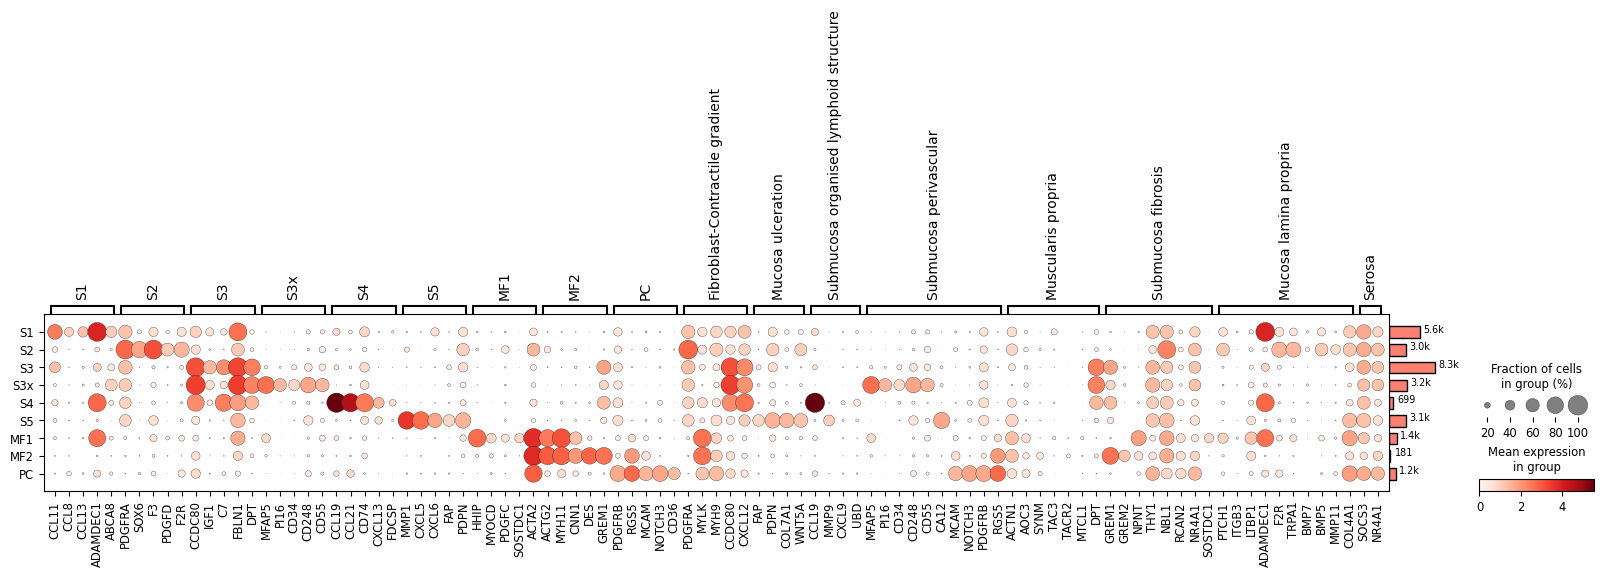

In [29]:
plot = sc.pl.dotplot(
    adata,
    var_names=marker_dict,
    groupby="annot1",
#    dendrogram=True,
    #categories_order=cell_order,
    figsize=(20, 2.3),
    return_fig=True,
    cmap='Reds',
    #save="xenium5k_v5_mesenchymal_annot_suspension_markers.pdf"
)

plot.add_totals()
plot.savefig("figures/dotplot_fibroblast_xenium_markers_barplot_merged.pdf")

## Merged dotplots without dublicate markers

In [39]:
marker_dict = {
    'S1': ['CCL11', 'CCL8', 'CCL13', 'ADAMDEC1', 'ABCA8'],
    'S2': ['PDGFRA', 'SOX6', 'F3', 'PDGFD', 'F2R'],
    'S3': ['CCDC80', 'IGF1',  'C7', 'FBLN1', 'DPT'],
    'S3x': ['MFAP5', 'PI16', 'CD34', 'CD248', 'CD55'],
    'S4': ['CCL19', 'CCL21', 'CD74', 'CXCL13', 'FDCSP'],
    'S5': ['MMP1', 'CXCL5', 'CXCL6', 'FAP', 'PDPN'],
    'MF1': ['HHIP', 'MYOCD', 'PDGFC',  'SOSTDC1', 'ACTA2'],
    'MF2': ['ACTG2', 'MYH11', 'CNN1', 'DES', 'GREM1'],
    'PC': ['PDGFRB', 'RGS5', 'MCAM', 'NOTCH3', 'CD36'],
    "Fibroblast-Contractile gradient": ["MYLK", "MYH9", "CXCL12"],
    "Mucosa ulceration": ["COL7A1", "WNT5A",
                          #"MMP12"
                         ],
    "Submucosa organised lymphoid structure": ["MMP9", "CXCL9", "UBD"],
    "Submucosa perivascular": ["CA12",
                               #"CCN1",
                               ],
    "Muscularis propria": ["ACTN1", "AOC3", "SYNM", "TAC3", "TACR2", "MTCL1"],
    "Submucosa fibrosis": ["GREM2", "NPNT", "THY1", "NBL1", "RCAN2"], 
    "Mucosa lamina propria": ["PTCH1", "ITGB3", "LTBP1", "TRPA1", "BMP7", "BMP5", "MMP11", "COL4A1"],
    "Serosa": ["SOCS3","NR4A1"]
}


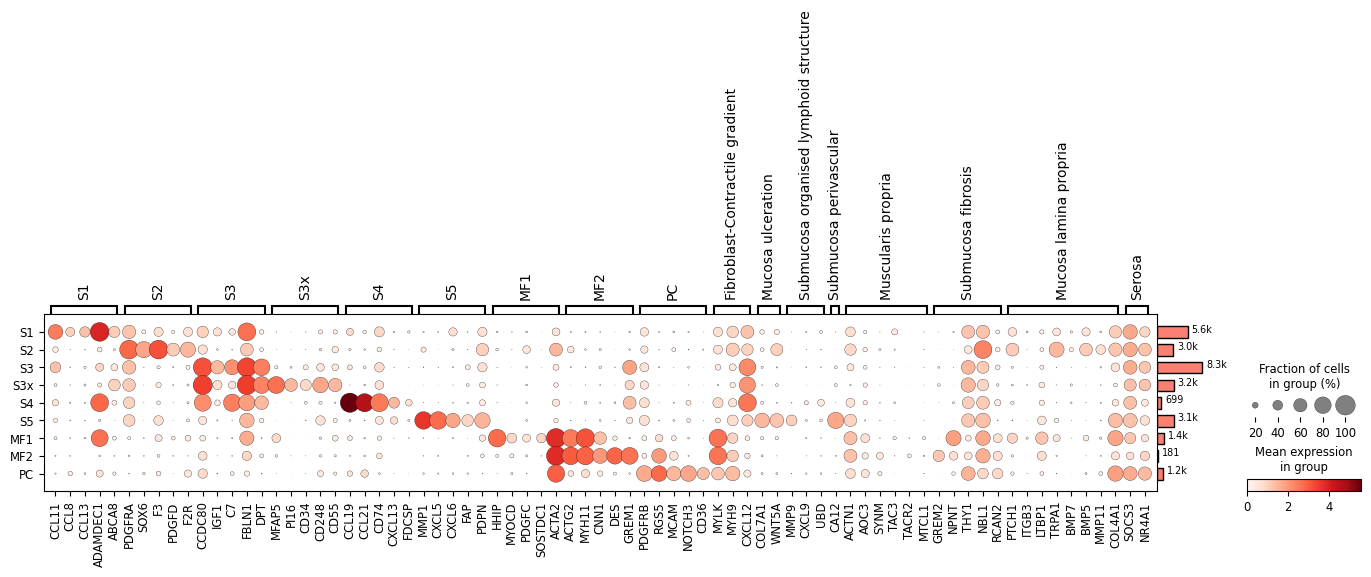

In [40]:
# Non-clustered rows
plot = sc.pl.dotplot(
    adata,
    var_names=marker_dict,
    groupby="annot1",
#    dendrogram=True,
    #categories_order=cell_order,
    figsize=(17, 2.3),
    return_fig=True,
    cmap='Reds',
    #save="xenium5k_v5_mesenchymal_annot_suspension_markers.pdf"
)

plot.add_totals()
plot.savefig("figures/dotplot_fibroblast_xenium_markers_barplot_merged_noDoubles_unclustered.pdf")

categories: S1, S2, S3, etc.
var_group_labels: S1, S2, S3, etc.


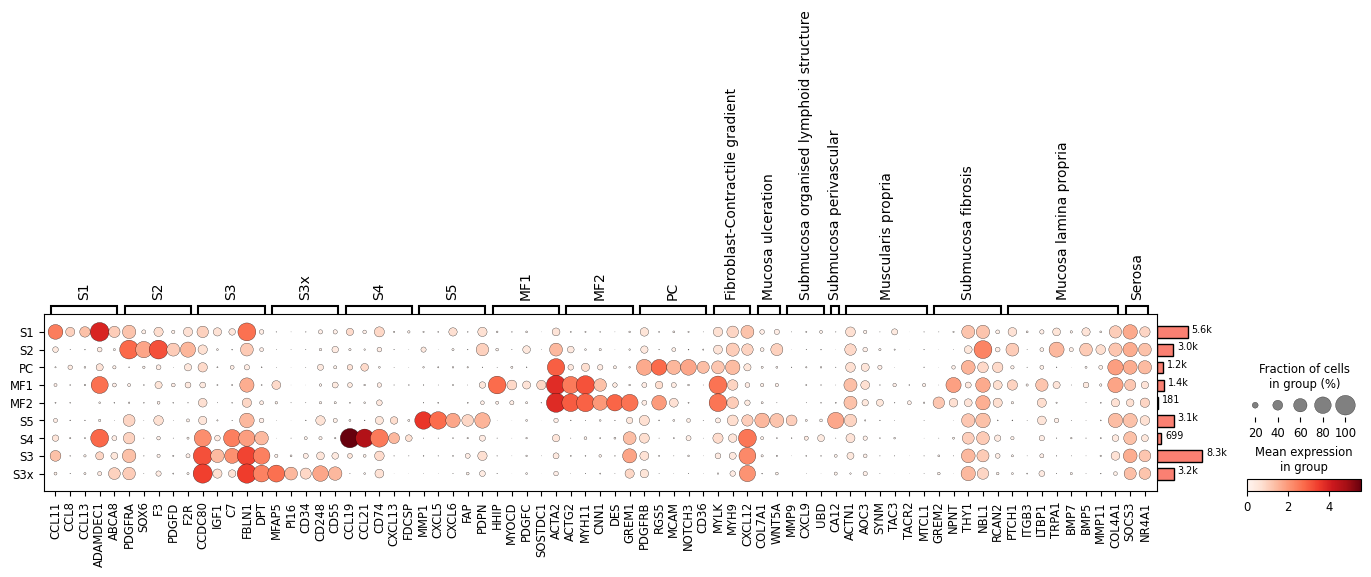

In [41]:
# clustered rows
plot = sc.pl.dotplot(
    adata,
    var_names=marker_dict,
    groupby="annot1",
    dendrogram=True,
    #categories_order=cell_order,
    figsize=(17, 2.3),
    return_fig=True,
    cmap='Reds',
    #save="xenium5k_v5_mesenchymal_annot_suspension_markers.pdf"
)

plot.add_totals()
plot.savefig("figures/dotplot_fibroblast_xenium_markers_barplot_merged_noDoubles_clustered.pdf")

## Mix markers

In [42]:
# Unpack markers to list
marker_list = [item for sublist in marker_dict.values() for item in sublist]
#marker_list

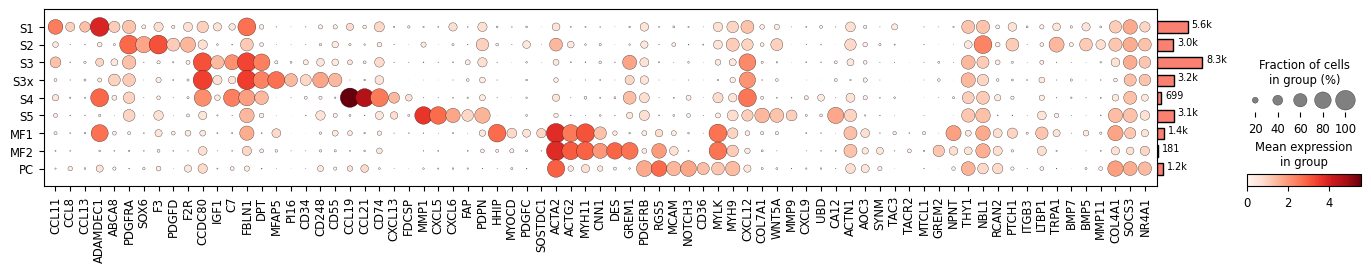

In [43]:
plot = sc.pl.dotplot(
    adata,
    var_names=marker_list,
    groupby="annot1",
#    dendrogram=True,
    #categories_order=cell_order,
    figsize=(17, 2.3),
    return_fig=True,
    cmap='Reds',
    #save="xenium5k_v5_mesenchymal_annot_suspension_markers.pdf"
)

plot.add_totals()
plot.show()
#plot.savefig("figures/dotplot_fibroblast_xenium_markers_barplot_merged_noDoubles_clustered.pdf")

## Biclustered dotplot

In [44]:
import scipy.cluster.hierarchy as sch

In [45]:
# Extract the gene expression matrix (cells x genes)
expression_matrix = adata[:, marker_list].X.toarray()  # Convert sparse to dense

# Compute a distance matrix and perform hierarchical clustering
linkage = sch.linkage(expression_matrix.T, method='ward')
#linkage = sch.linkage(expression_matrix.T, method='weighted')
#linkage = sch.linkage(expression_matrix.T, method='average')
#linkage = sch.linkage(expression_matrix.T, method='single')

# Get the clustering order
dendro_order = sch.leaves_list(linkage)

# Reorder genes based on clustering
reordered_genes = [marker_list[i] for i in dendro_order]

# Plot the dotplot with clustered genes
#sc.pl.dotplot(adata, reordered_genes, groupby="annot1")

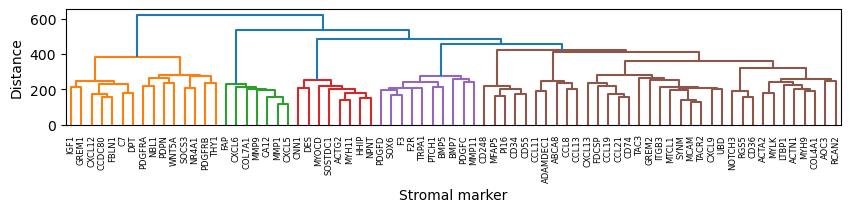

In [46]:
# Plot dendrogram
plt.figure(figsize=(10, 1.5))
#plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Stromal marker')
plt.ylabel('Distance')

sch.dendrogram(linkage, labels=marker_list)

#plt.show()
plt.savefig("figures/dendrogram_fibroblast_xenium_markers_barplot_merged_noDoubles_clustered_biclustered.pdf", bbox_inches='tight')

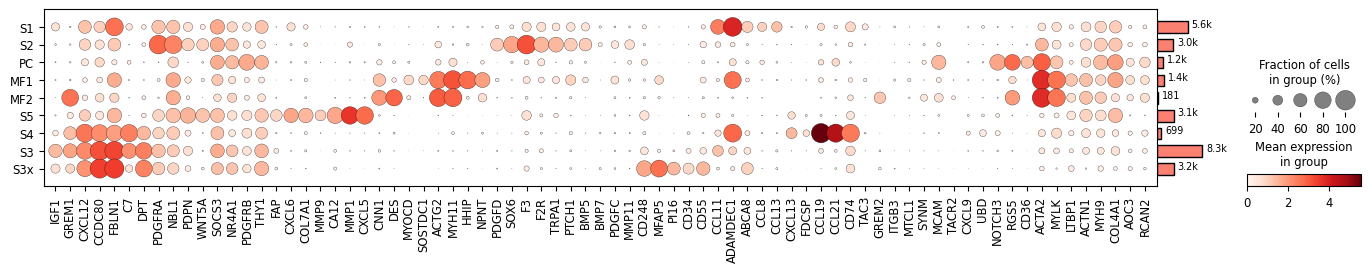

In [47]:
plot = sc.pl.dotplot(
    adata,
    var_names=reordered_genes,
    groupby="annot1",
    dendrogram=True,
    #categories_order=cell_order,
    figsize=(17, 2.3),
    return_fig=True,
    cmap='Reds',
    #save="xenium5k_v5_mesenchymal_annot_suspension_markers.pdf"
)

plot.add_totals()
#plot.show()
plot.savefig("figures/dotplot_fibroblast_xenium_markers_barplot_merged_noDoubles_clustered_biclustered.pdf")